# Preprocess

In [1]:
import pandas as pd
import numpy as np
import importlib as imp
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sys

sys.path.insert(0,'..\src')

In [2]:
try:
    imp.reload(sys.modules['preprocess'])
except KeyError:
    pass

from preprocess import BasePreprocess

In [3]:
try:
    imp.reload(sys.modules['Scoring'])
except KeyError:
    pass

from Scoring import Scoring
s = Scoring()

In [4]:
data1 = BasePreprocess(pd.read_csv('../data/cars.csv')).run(ohIncludeBool = True, toDrop = ['manufacturer_name', 'model_name', 'number_of_photos', 'color', 'up_counter'])
data2 = BasePreprocess(pd.read_csv('../data/lab2/diabetes_012_health_indicators_BRFSS2015.csv')).run()

Found gaps in 1 columns
Found 7 categorial signs (meaning object types)
Found 41 categorial signs (meaning bool types)
Found gaps in 0 columns
Found 0 categorial signs (meaning object types)


In [5]:
data1

,odometer_value,year_produced,engine_capacity,price_usd,duration_listed,engine_has_gas_True,has_warranty_True,is_exchangeable_True,feature_0_True,feature_1_True,...,body_type_van_True,state_new_True,state_owned_True,drivetrain_front_True,drivetrain_rear_True,location_region_Витебская обл._True,location_region_Гомельская обл._True,location_region_Гродненская обл._True,location_region_Минская обл._True,location_region_Могилевская обл._True
0,190000,2010,2.5,10900.00,16,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,290000,2002,3.0,5000.00,83,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
2,402000,2001,2.5,2800.00,151,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
3,10000,1999,3.0,9999.00,86,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
4,280000,2001,2.5,2134.11,7,False,False,True,False,True,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,3.5,2750.00,301,False,False,True,False,True,...,False,False,True,True,False,False,False,False,True,False
38527,321000,2004,2.2,4800.00,317,False,False,True,False,True,...,False,False,True,True,False,False,False,False,False,False
38528,777957,2000,3.5,4300.00,369,False,False,False,False,True,...,False,False,True,True,False,False,False,False,True,False
38529,20000,2001,2.0,4000.00,490,False,False,True,False,True,...,False,False,True,True,False,False,False,False,False,False


In [6]:
data2

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [7]:
y1 = data1['price_usd']
X1 = data1.drop(['price_usd'], axis=1)

In [8]:
y1

0        10900.00
1         5000.00
2         2800.00
3         9999.00
4         2134.11
           ...   
38526     2750.00
38527     4800.00
38528     4300.00
38529     4000.00
38530     3200.00
Name: price_usd, Length: 38531, dtype: float64

In [9]:
X1

,odometer_value,year_produced,engine_capacity,duration_listed,engine_has_gas_True,has_warranty_True,is_exchangeable_True,feature_0_True,feature_1_True,feature_2_True,...,body_type_van_True,state_new_True,state_owned_True,drivetrain_front_True,drivetrain_rear_True,location_region_Витебская обл._True,location_region_Гомельская обл._True,location_region_Гродненская обл._True,location_region_Минская обл._True,location_region_Могилевская обл._True
0,190000,2010,2.5,16,False,False,False,False,True,True,...,False,False,True,False,False,False,False,False,True,False
1,290000,2002,3.0,83,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2,402000,2001,2.5,151,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,10000,1999,3.0,86,False,False,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,280000,2001,2.5,7,False,False,True,False,True,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,3.5,301,False,False,True,False,True,False,...,False,False,True,True,False,False,False,False,True,False
38527,321000,2004,2.2,317,False,False,True,False,True,False,...,False,False,True,True,False,False,False,False,False,False
38528,777957,2000,3.5,369,False,False,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
38529,20000,2001,2.0,490,False,False,True,False,True,False,...,False,False,True,True,False,False,False,False,False,False


In [10]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=38)

In [11]:
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((30824, 45), (7707, 45), (30824,), (7707,))

In [12]:
y2 = data2['Diabetes_012']
X2 = data2.drop(['Diabetes_012'], axis=1)

In [13]:
y2

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 253680, dtype: float64

In [14]:
X2

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [15]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=38)

In [16]:
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((169965, 21), (83715, 21), (169965,), (83715,))

In [17]:
from preprocess import Sampling

X_train_ros, y_train_ros = Sampling.sample(X = X2_train, y = y2_train, usingMethod = 'RandomlyOverSample')
X_train_rus, y_train_rus = Sampling.sample(X = X2_train, y = y2_train, usingMethod = 'RandomlyUnderSample')

[(0.0, 143231), (1.0, 143231), (2.0, 143231)]
[(0.0, 3096), (1.0, 3096), (2.0, 3096)]


# Понижение размерности brewed by *SKlearn*

In [18]:
from sklearn.feature_selection import VarianceThreshold

In [43]:
vt = VarianceThreshold(.5)
X_vt = vt.fit_transform(X1)
X_vt.shape

(38531, 3)

In [44]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,odometer_value,year_produced,duration_listed
0,190000.0,2010.0,16.0
1,290000.0,2002.0,83.0
2,402000.0,2001.0,151.0
3,10000.0,1999.0,86.0
4,280000.0,2001.0,7.0


In [30]:
vt = VarianceThreshold(1.5)
X_vt = vt.fit_transform(X2)
X_vt.shape

(253680, 5)

In [31]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,BMI,MentHlth,PhysHlth,Age,Income
0,40.0,18.0,15.0,9.0,3.0
1,25.0,0.0,0.0,7.0,1.0
2,28.0,30.0,30.0,9.0,8.0
3,27.0,0.0,0.0,11.0,6.0
4,24.0,3.0,0.0,11.0,4.0


In [32]:
from sklearn.preprocessing import StandardScaler

In [39]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(pd.DataFrame(StandardScaler().fit_transform(X1), columns=X1.columns))
X_vt.shape

(38531, 16)

In [40]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,engine_has_gas_True,has_warranty_True,is_exchangeable_True,feature_3_True,transmission_mechanical_True,engine_fuel_gas_True,engine_fuel_hybrid-petrol_True,body_type_coupe_True,body_type_limousine_True,body_type_minivan_True,body_type_van_True,state_new_True,state_owned_True,location_region_Гомельская обл._True,location_region_Минская обл._True,location_region_Могилевская обл._True
0,-0.190329,-0.108583,-0.737996,1.620421,-1.409738,-0.190329,-0.078335,-0.131197,-0.01765,-0.321423,-0.146353,-0.10723,0.146353,-0.297864,0.768257,-0.273302
1,-0.190329,-0.108583,1.355021,-0.617124,-1.409738,-0.190329,-0.078335,-0.131197,-0.01765,-0.321423,-0.146353,-0.10723,0.146353,-0.297864,0.768257,-0.273302
2,-0.190329,-0.108583,1.355021,-0.617124,-1.409738,-0.190329,-0.078335,-0.131197,-0.01765,-0.321423,-0.146353,-0.10723,0.146353,-0.297864,0.768257,-0.273302
3,-0.190329,-0.108583,1.355021,-0.617124,0.709351,-0.190329,-0.078335,-0.131197,-0.01765,-0.321423,-0.146353,-0.10723,0.146353,-0.297864,0.768257,-0.273302
4,-0.190329,-0.108583,1.355021,1.620421,-1.409738,-0.190329,-0.078335,-0.131197,-0.01765,-0.321423,-0.146353,-0.10723,0.146353,3.357234,-1.301648,-0.273302


In [45]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(pd.DataFrame(StandardScaler().fit_transform(X2), columns=X2.columns))
X_vt.shape

(253680, 10)

In [46]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,HighBP,HighChol,Stroke,PhysActivity,Veggies,NoDocbcCost,PhysHlth,Age,Education,Income
0,1.153688,1.165254,-0.205637,-1.762814,0.482087,-0.303173,1.233999,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-0.205637,0.567275,-2.074316,3.298445,-0.486592,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,-0.205637,-1.762814,-2.074316,3.298445,2.954590,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,-0.205637,0.567275,0.482087,-0.303173,-0.486592,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,-0.205637,0.567275,0.482087,-0.303173,-0.486592,0.971733,-0.051162,-0.991662


In [47]:
from sklearn.feature_selection import SelectKBest

In [57]:
skb = SelectKBest(k=6)
X_skb = skb.fit_transform(X1, y1)

In [58]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb.head()

,year_produced,has_warranty_True,feature_7_True,feature_8_True,state_new_True,state_owned_True
0,2010.0,0.0,1.0,1.0,0.0,1.0
1,2002.0,0.0,0.0,0.0,0.0,1.0
2,2001.0,0.0,0.0,1.0,0.0,1.0
3,1999.0,0.0,0.0,0.0,0.0,1.0
4,2001.0,0.0,0.0,0.0,0.0,1.0


In [59]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [61]:
regr = Lasso(0.96).fit(X1_train, y1_train)
cla = DecisionTreeClassifier(max_depth=9).fit(X_train_rus, y_train_rus)

In [62]:
rfe = RFE(estimator=regr, n_features_to_select=5, step=1).fit(X1, y1)
X_rfe = pd.DataFrame(rfe.transform(X1), columns=rfe.get_feature_names_out())
X_rfe

,has_warranty_True,feature_7_True,state_new_True,drivetrain_front_True,drivetrain_rear_True
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
38526,0.0,0.0,0.0,1.0,0.0
38527,0.0,0.0,0.0,1.0,0.0
38528,0.0,0.0,0.0,1.0,0.0
38529,0.0,0.0,0.0,1.0,0.0


In [63]:
rfe = RFE(estimator=cla, n_features_to_select=5, step=1).fit(X2, y2)
X_rfe = pd.DataFrame(rfe.transform(X2), columns=rfe.get_feature_names_out())
X_rfe

,HighBP,HighChol,BMI,GenHlth,Age
0,1.0,1.0,40.0,5.0,9.0
1,0.0,0.0,25.0,3.0,7.0
2,1.0,1.0,28.0,5.0,9.0
3,1.0,0.0,27.0,2.0,11.0
4,1.0,1.0,24.0,2.0,11.0
...,...,...,...,...,...
253675,1.0,1.0,45.0,3.0,5.0
253676,1.0,1.0,18.0,4.0,11.0
253677,0.0,0.0,28.0,1.0,2.0
253678,1.0,0.0,23.0,3.0,7.0


In [64]:
import matplotlib.pyplot as plt

<BarContainer object of 45 artists>

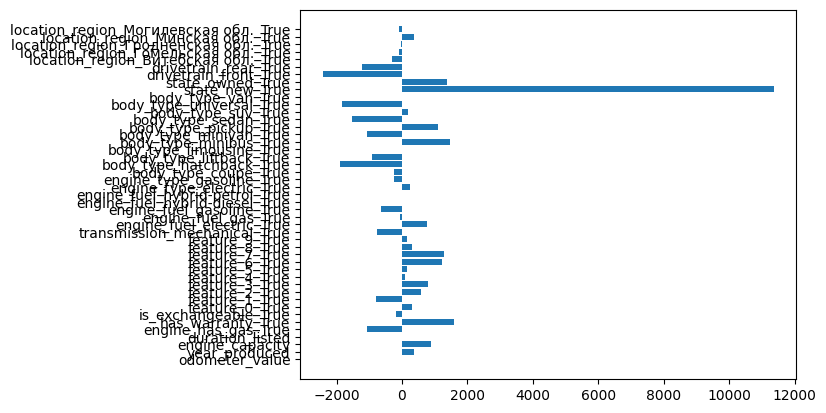

In [65]:
plt.barh(width=regr.coef_, y=X1.columns)

<BarContainer object of 21 artists>

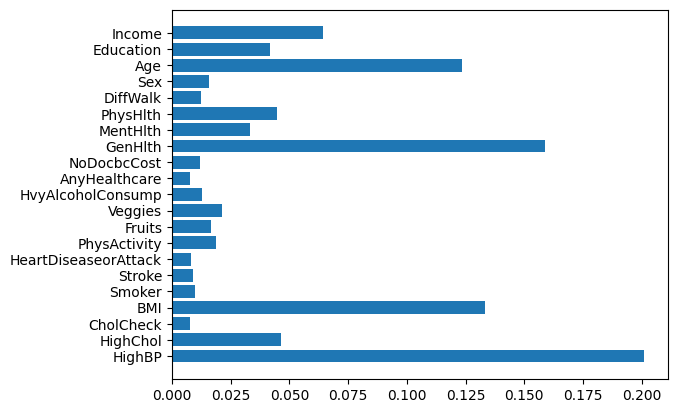

In [66]:
plt.barh(width=cla.feature_importances_, y=X2.columns)

In [67]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X1, y1)
print(X_pca.shape)
sum(pca.explained_variance_ratio_)

(38531, 2)


0.9999999970573744

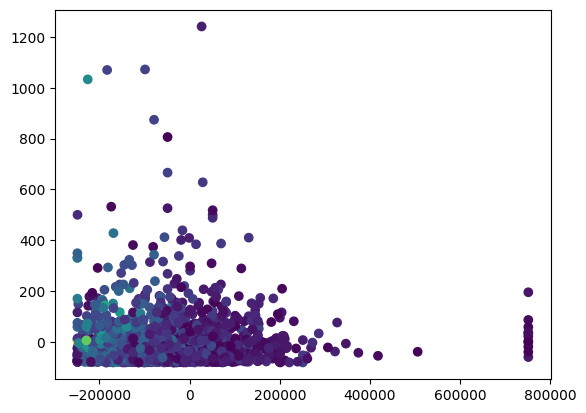

In [79]:
plt.scatter(X_pca[:,0][:2000], X_pca[:,1][:2000], c=y1[:2000])

In [80]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X2, y2)
print(X_pca.shape)
sum(pca.explained_variance_ratio_)

(253680, 2)


0.7030187872893228

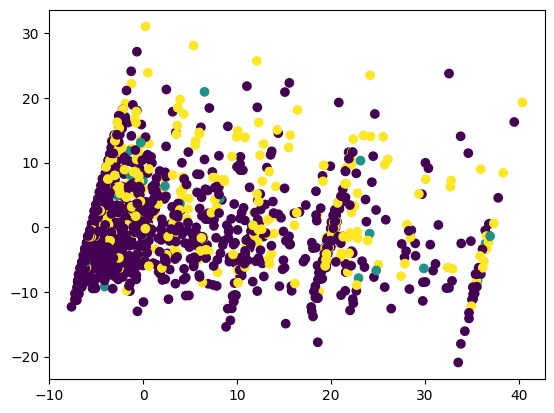

In [81]:
plt.scatter(X_pca[:,0][:2000], X_pca[:,1][:2000], c=y2[:2000])

In [82]:
pca_2 = PCA(n_components=3)
X_pca_2 = pca_2.fit_transform(X2, y2)
print(X_pca.shape)
sum(pca_2.explained_variance_ratio_)

(253680, 2)


0.9142616542581217

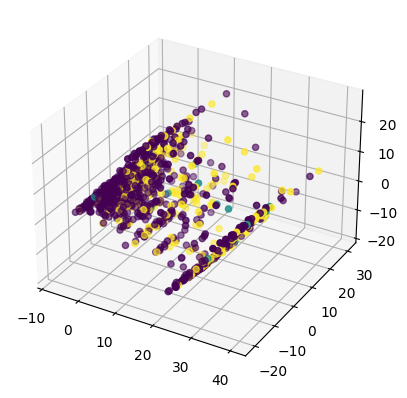

In [83]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2[:,0][:2000], X_pca_2[:,1][:2000], X_pca_2[:,2][:2000], c=y2[:2000])

In [84]:
from sklearn.manifold import TSNE, Isomap

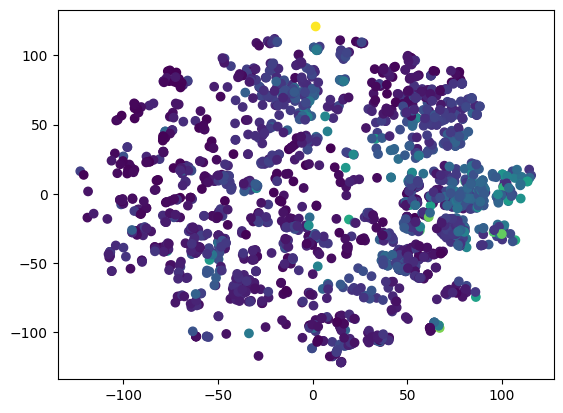

In [85]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(pd.DataFrame(StandardScaler().fit_transform(X1), columns=X1.columns))
plt.scatter(X_tsne[:,0][:2000], X_tsne[:,1][:2000], c=y1[:2000])

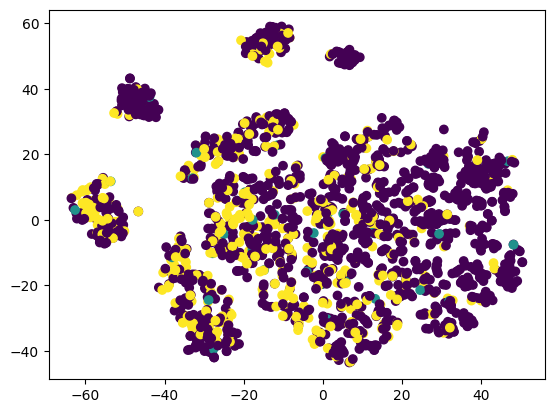

In [87]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(pd.DataFrame(StandardScaler().fit_transform(X2[:2000]), columns=X2.columns))
plt.scatter(X_tsne[:,0][:2000], X_tsne[:,1][:2000], c=y2[:2000])

d:\jupyter\Machine Learning\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 9 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\jupyter\Machine Learning\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\jupyter\Machine Learning\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\jupyter\Machine Learning\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat

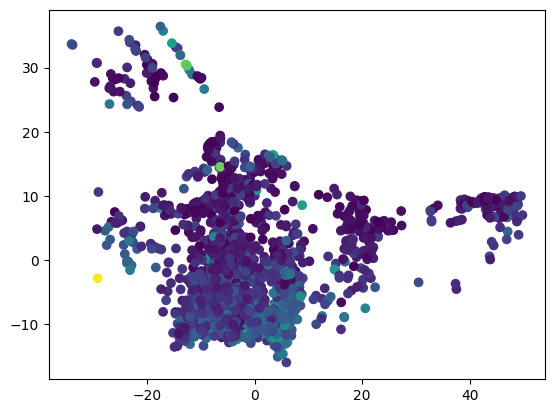

In [88]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(pd.DataFrame(StandardScaler().fit_transform(X1[:2000]), columns=X1.columns))
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y1[:2000])

d:\jupyter\Machine Learning\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\jupyter\Machine Learning\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


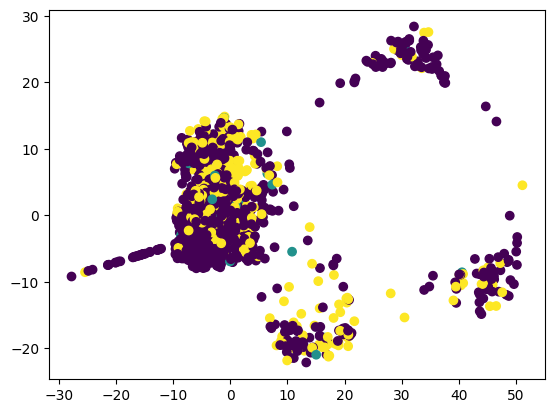

In [89]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(pd.DataFrame(StandardScaler().fit_transform(X2[:2000]), columns=X2.columns))
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y2[:2000])

# lilPCA

In [27]:
try:
    imp.reload(sys.modules['algorithms'])
except KeyError:
    pass

from algorithms import PCA as mypcalol

In [28]:
my_pca = mypcalol(n=2)
mXp = my_pca.fit_transform(X1, y1)
mXp.shape

(38531, 2)

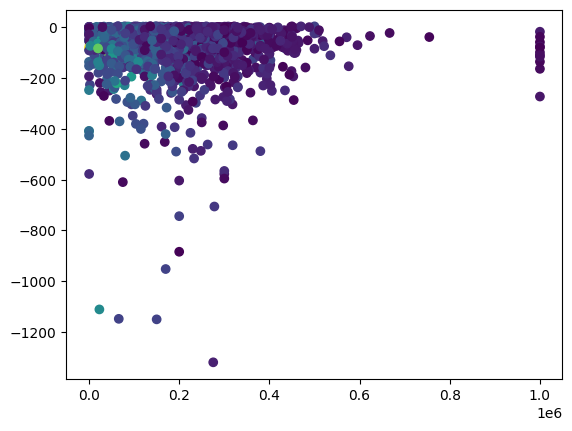

In [29]:
plt.scatter(mXp[:,0][:2000], mXp[:,1][:2000], c=y1[:2000])

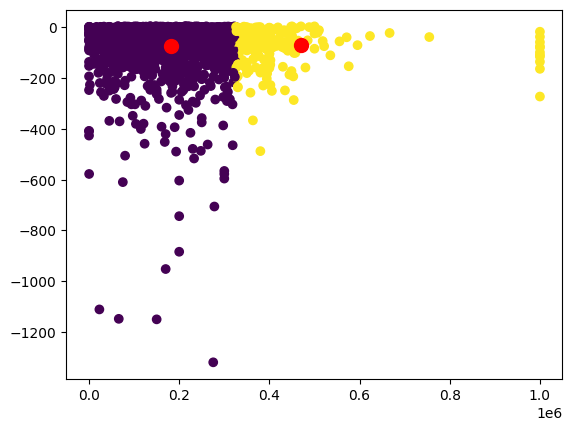

In [32]:
km = kmeans(2)
km.fit(mXp[:2000])

plt.scatter(mXp[:,0][:2000], mXp[:,1][:2000], c=km.labels_)
plt.scatter(km.centroids[:,0], km.centroids[:,1], s=100, c='red')

In [33]:
my_pca = mypcalol(n=2)
mXp = my_pca.fit_transform(X2, y2)
mXp.shape

(253680, 2)

In [19]:
import matplotlib.pyplot as plt

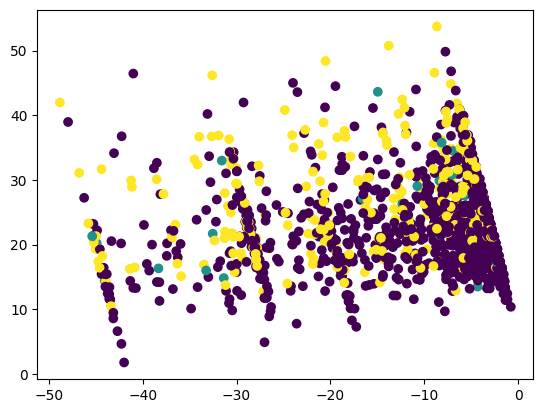

In [34]:
plt.scatter(mXp[:,0][:2000], mXp[:,1][:2000], c=y2[:2000])

In [31]:
try:
    imp.reload(sys.modules['algorithms'])
except KeyError:
    pass

from algorithms import kmeans

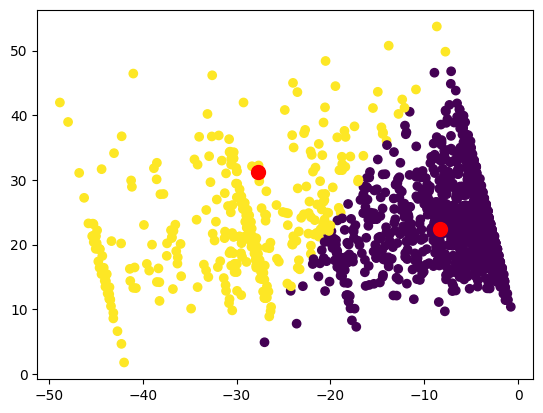

In [35]:
km = kmeans(2)
km.fit(mXp[:2000])

plt.scatter(mXp[:,0][:2000], mXp[:,1][:2000], c=km.labels_)
plt.scatter(km.centroids[:,0], km.centroids[:,1], s=100, c='red')

In [37]:
try:
    imp.reload(sys.modules['algorithms'])
except KeyError:
    pass

from algorithms import LRwR

In [38]:
MyRegr = LRwR()

In [36]:
from sklearn.preprocessing import StandardScaler

In [40]:
MyRegr.fit((X1_train - X1_train.mean())/X1_train.std(), y1_train, k=1e-14)

In [44]:
MyRegr.w

array([3.90522692e-08, 3.90522692e-08, 3.90522692e-08, 3.90522692e-08,
       3.90522692e-08, 3.90522692e-08, 3.90522692e-08, 3.90522692e-08,
       3.90522692e-08, 3.90522692e-08, 3.90522692e-08, 3.90522692e-08,
       3.90522692e-08, 3.90522692e-08, 3.90522692e-08, 3.90522692e-08,
       3.90522692e-08, 3.90522692e-08, 3.90522692e-08, 3.90522692e-08,
       3.90522692e-08, 3.90522692e-08, 3.90522692e-08, 3.90522692e-08,
       3.90522692e-08, 3.90522692e-08, 3.90522692e-08, 3.90522692e-08,
       3.90522692e-08, 3.90522692e-08, 3.90522692e-08, 3.90522692e-08,
       3.90522692e-08, 3.90522692e-08, 3.90522692e-08, 3.90522692e-08,
       3.90522692e-08, 3.90522692e-08, 3.90522692e-08, 3.90522692e-08,
       3.90522692e-08, 3.90522692e-08, 3.90522692e-08, 3.90522692e-08,
       3.90522692e-08, 3.90522692e-08])

In [51]:
MyRegr.predict(X1_test)

array([3023.224570546669, 96.04642787832196, 3053.5056424252425, ...,
       128.7798331951763, 2908.906549598455, 2619.2410006785453],
      dtype=object)